---

# 0 Initialization

In [2]:
import numpy as np
import timeit
from sklearn.datasets import load_breast_cancer, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

---

# 1 Computational Complexity

A. Write customer functions for

`1.` Calculating the inner product of two vectors.

In [2]:
def my_inner_product(x,y):
    l = len(x)
    s = 0
    for i in range(l):
        s = s + x[i]*y[i]
    return(s)

`2.` Calcuatling the product of two matrices.

In [3]:
def my_matrix_product(A,B):
    Bt = np.transpose(B)
    p = A.shape[0]
    q = A.shape[1]
    r = B.shape[1]
    C = np.zeros((p,r))
    for i in range(p):
        for j in range(r):
            C[i][j] = my_inner_product(A[i],Bt[j])
    return(C)

---
B. Generate random $m \times n$ matrix $X$ and $n \times p$ matrix $Y$, for $m = 50, n = 100, p = 200$. Compute

`1.` The amount of time it takes to multiply $X$ and $Y$ using the custom code you wrote.

In [4]:
np.random.seed(12345) # for replication
m = 50
n = 100
p = 200
X = np.random.rand(m,n)
Y = np.random.rand(n,p)
start_time = timeit.default_timer()
Z1 = my_matrix_product(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

0.43125660716136954


`2.` The amount of time it takes to multiply $X$ and $Y$ using built-in NumPy methods.

In [5]:
start_time = timeit.default_timer()
Z2 = np.matmul(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

0.07990336883246352


---
C. Now increase $m, n, p$ each by a factor of 10.

`1.` How long do you expect it would take to multiply $X$ and $Y$ using your custom code? How long does it actually take?

In [6]:
m = 500
n = 1000
p = 2000
X = np.random.rand(m,n)
Y = np.random.rand(n,p)
start_time = timeit.default_timer()
Z1 = my_matrix_product(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

397.5606427220905


Expected time: 431.26 seconds

Actual time: 397.56 seconds

`2.` How long do you expect it would take to multiply $X$ and $Y$ using built-in NumPy methods? How long does it actually take?


In [7]:
start_time = timeit.default_timer()
Z2 = np.matmul(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

0.06113356497917266


Expected time: 7.99 seconds

Actual time: 0.06 seconds

---
D. Increase $m, n, p$ each by a factor of 10 again, and repeat the above but using NumPy's built-in methods only. How long does it take to multiply $X$ and $Y$ ? Did it increase by the same factor as it did before when all the dimensions were increased by a factor of 10? Why or why not?

In [8]:
m = 5000
n = 10000
p = 20000
X = np.random.rand(m,n)
Y = np.random.rand(n,p)
start_time = timeit.default_timer()
Z2 = np.matmul(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

28.633377739569596


Actual time: 28.63 seconds

No. A possible reason is that the time complexity of the NumPy's built-in method for matrix multiplication may not be linear in $m$, $n$ or $p$.

---
E. Generate a $n \times p$ matrix $X$ and a $n$-vector $y$.

`1.` Set $n = 5000, p = 200$. How long does it take to regress $y$ on $X$?

In [9]:
n = 5000
p = 200
X = np.random.rand(n,p)
Y = np.random.rand(n)
start_time = timeit.default_timer()
Z2 = np.linalg.lstsq(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

0.18030789107501732


Actual time: 0.18 seconds

`2.` Set $n = 50000, p = 200$. How long do you expect the same regression would take? How long does it actually take?

In [10]:
n = 50000
p = 200
X = np.random.rand(n,p)
Y = np.random.rand(n)
start_time = timeit.default_timer()
Z2 = np.linalg.lstsq(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

0.4811896451897155


Expected time: 1.80 seconds 

Actual time: 0.48 seconds

`3.` Set $n = 5000, p = 2000$. How long do you expect the same regression would take? How long does it actually take?

In [11]:
n = 5000
p = 2000
X = np.random.rand(n,p)
Y = np.random.rand(n)
start_time = timeit.default_timer()
Z2 = np.linalg.lstsq(X,Y)
end_time = timeit.default_timer()
print(end_time - start_time)

4.264423975418367


Expected time: 18.03 seconds 

Actual time: 4.26 seconds

---

# 2 Breast Cancer Data

Use the breast cancer data from `sklearn` to perform the following exercises.

A. Load the breast cancer data with the `load_breast_cancer` method from the module `sklearn.datasets`.


In [3]:
dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target

B. Standardize each feature in the data set.

In [4]:
X = (X-X.mean(0))/X.std(0)

C. Perform PCA on the standardized features. How many principle components must we keep to explain 90% of the total variance? How much variance is explained if we keep 2?

In [6]:
pca = PCA().fit(X)
evr = pca.explained_variance_ratio_
evr_sum = np.cumsum(evr)
print(np.where(evr_sum>0.9)[0][0]+1)
print(evr_sum[1])
print(evr)

7
0.6324320765155942
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


We must keep 7 principle components to explain 90% of the total variance. 

If we keep 2, approximately 63.24% of the total  variance is explained. 

---
D. Perform $k$-means with $k = 2$ on the full set of features, and on the first 2 principle components only. Compare how well the clusters found by $k$-means in each of these cases compare to the true targets of the data set.

In [15]:
print(len(Y))
print(sum(Y))
X_pca = pca.transform(X)
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
Y_pred = kmeans.labels_
if sum(abs(Y-(1-Y_pred)))<sum(abs(Y-Y_pred)):
    Y_pred = 1-Y_pred
gap = Y-Y_pred
print(sum(gap[gap>0]))
print(sum(gap[gap<0]))
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_pca[:,:2])
Y_pred = kmeans.labels_
if sum(abs(Y-(1-Y_pred)))<sum(abs(Y-Y_pred)):
    Y_pred = 1-Y_pred
print(sum(gap[gap>0]))
print(sum(gap[gap<0]))

569
357
18
-36
18
-36


Both cases generate the same labeling results and the comparison with the true targets is as follows: 

|$Y_p$\ $Y$|  0  |  1  | Total |
|:--------:|:---:|:---:|:-----:|
| 0        | 176 | 18  | 194   |
| 1        | 36  | 339 | 375   |
| Total    | 212 | 357 | 569   |

---

# 3 Olivetti Faces

Use the Olivetti faces data set available through `sklearn` to do the following.

A. Fetch and load the data with the `fetch_olivetti_faces` method from the module `sklearn.datasets`.

In [16]:
dataset = fetch_olivetti_faces()
X=dataset.data

B. Demean each face in the data set (no need to divide by standard deviation as every dimension is a number between a fixed range representing a pixel).

In [17]:
mu = X.mean(0)
X = X-mu

C. Compute and display the first 9 eigenfaces.


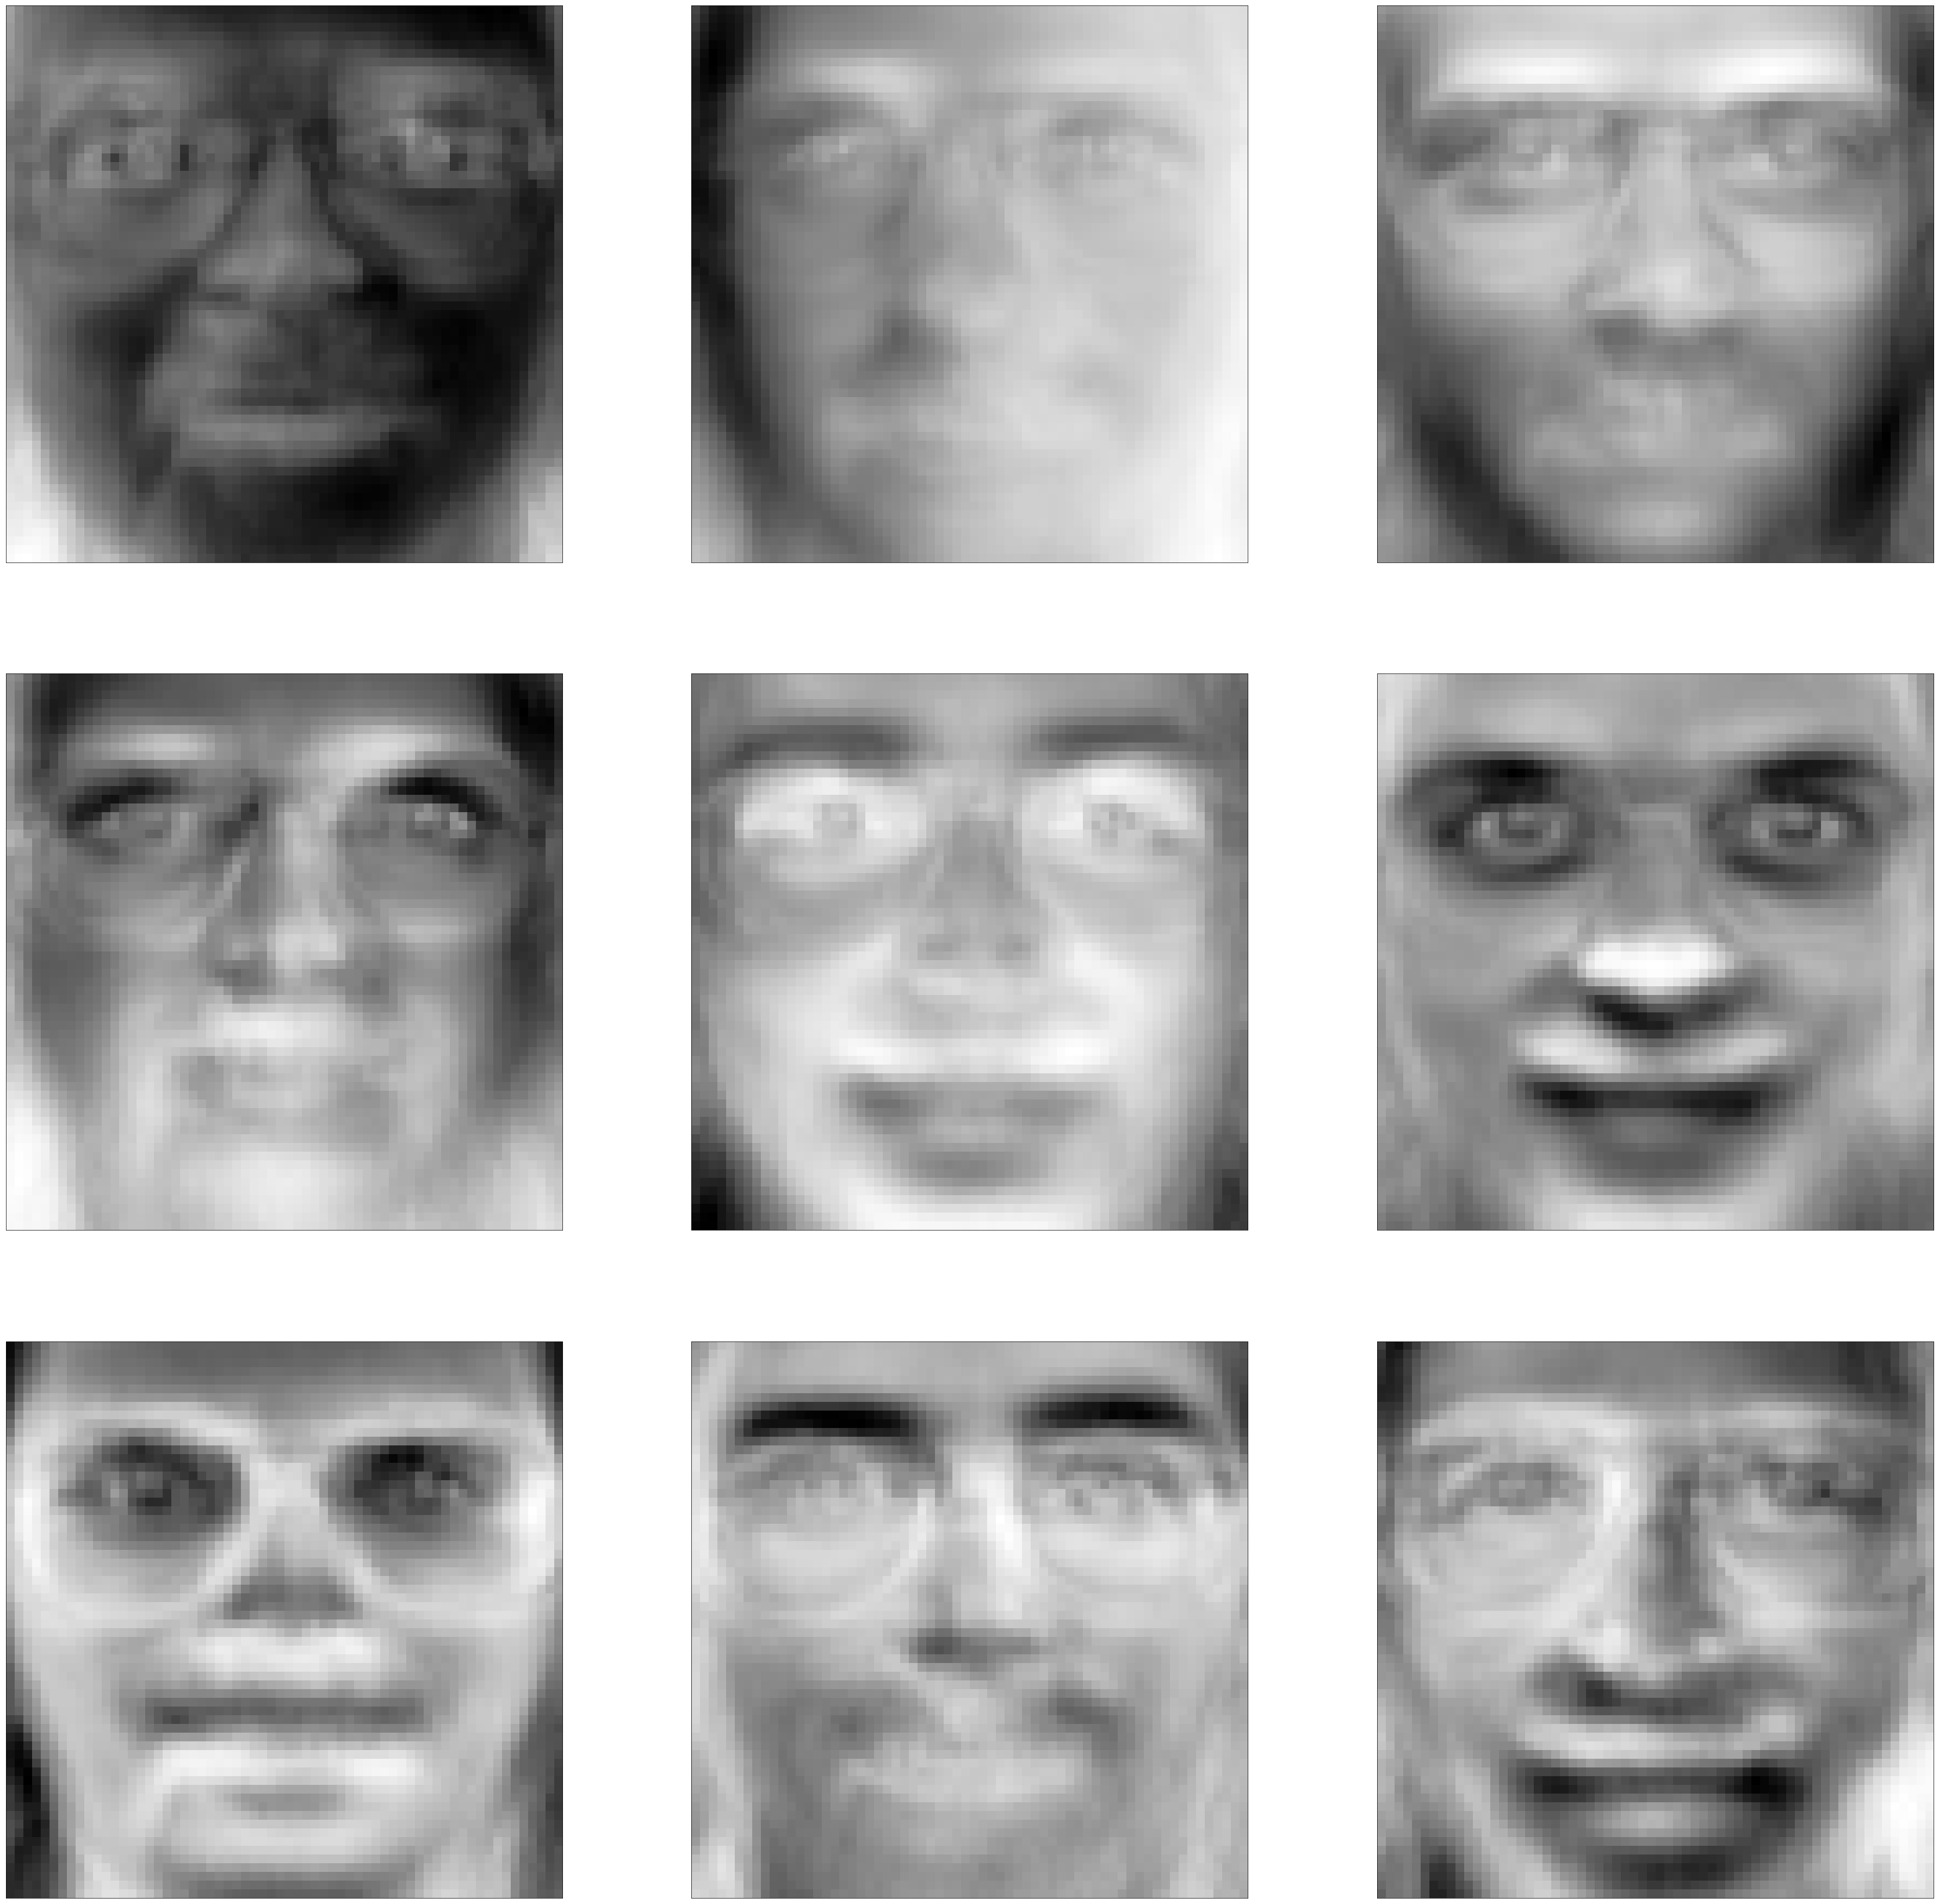

In [18]:
pca = PCA().fit(X)
eigenfaces = pca.components_
fig = plt.figure(figsize=(64,64))
for i in range(9):
    x = eigenfaces[i]
    x = x.reshape((64,64))
    face = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    face.imshow(x,cmap='Greys_r')
plt.show()

D. In class we showed that any given face in the data set can be represented as a linear combination of the eigenfaces. For any face in the data set, show how it progresses as we combine 1, 51, 101, ... eigenfaces, until the full image is recovered.

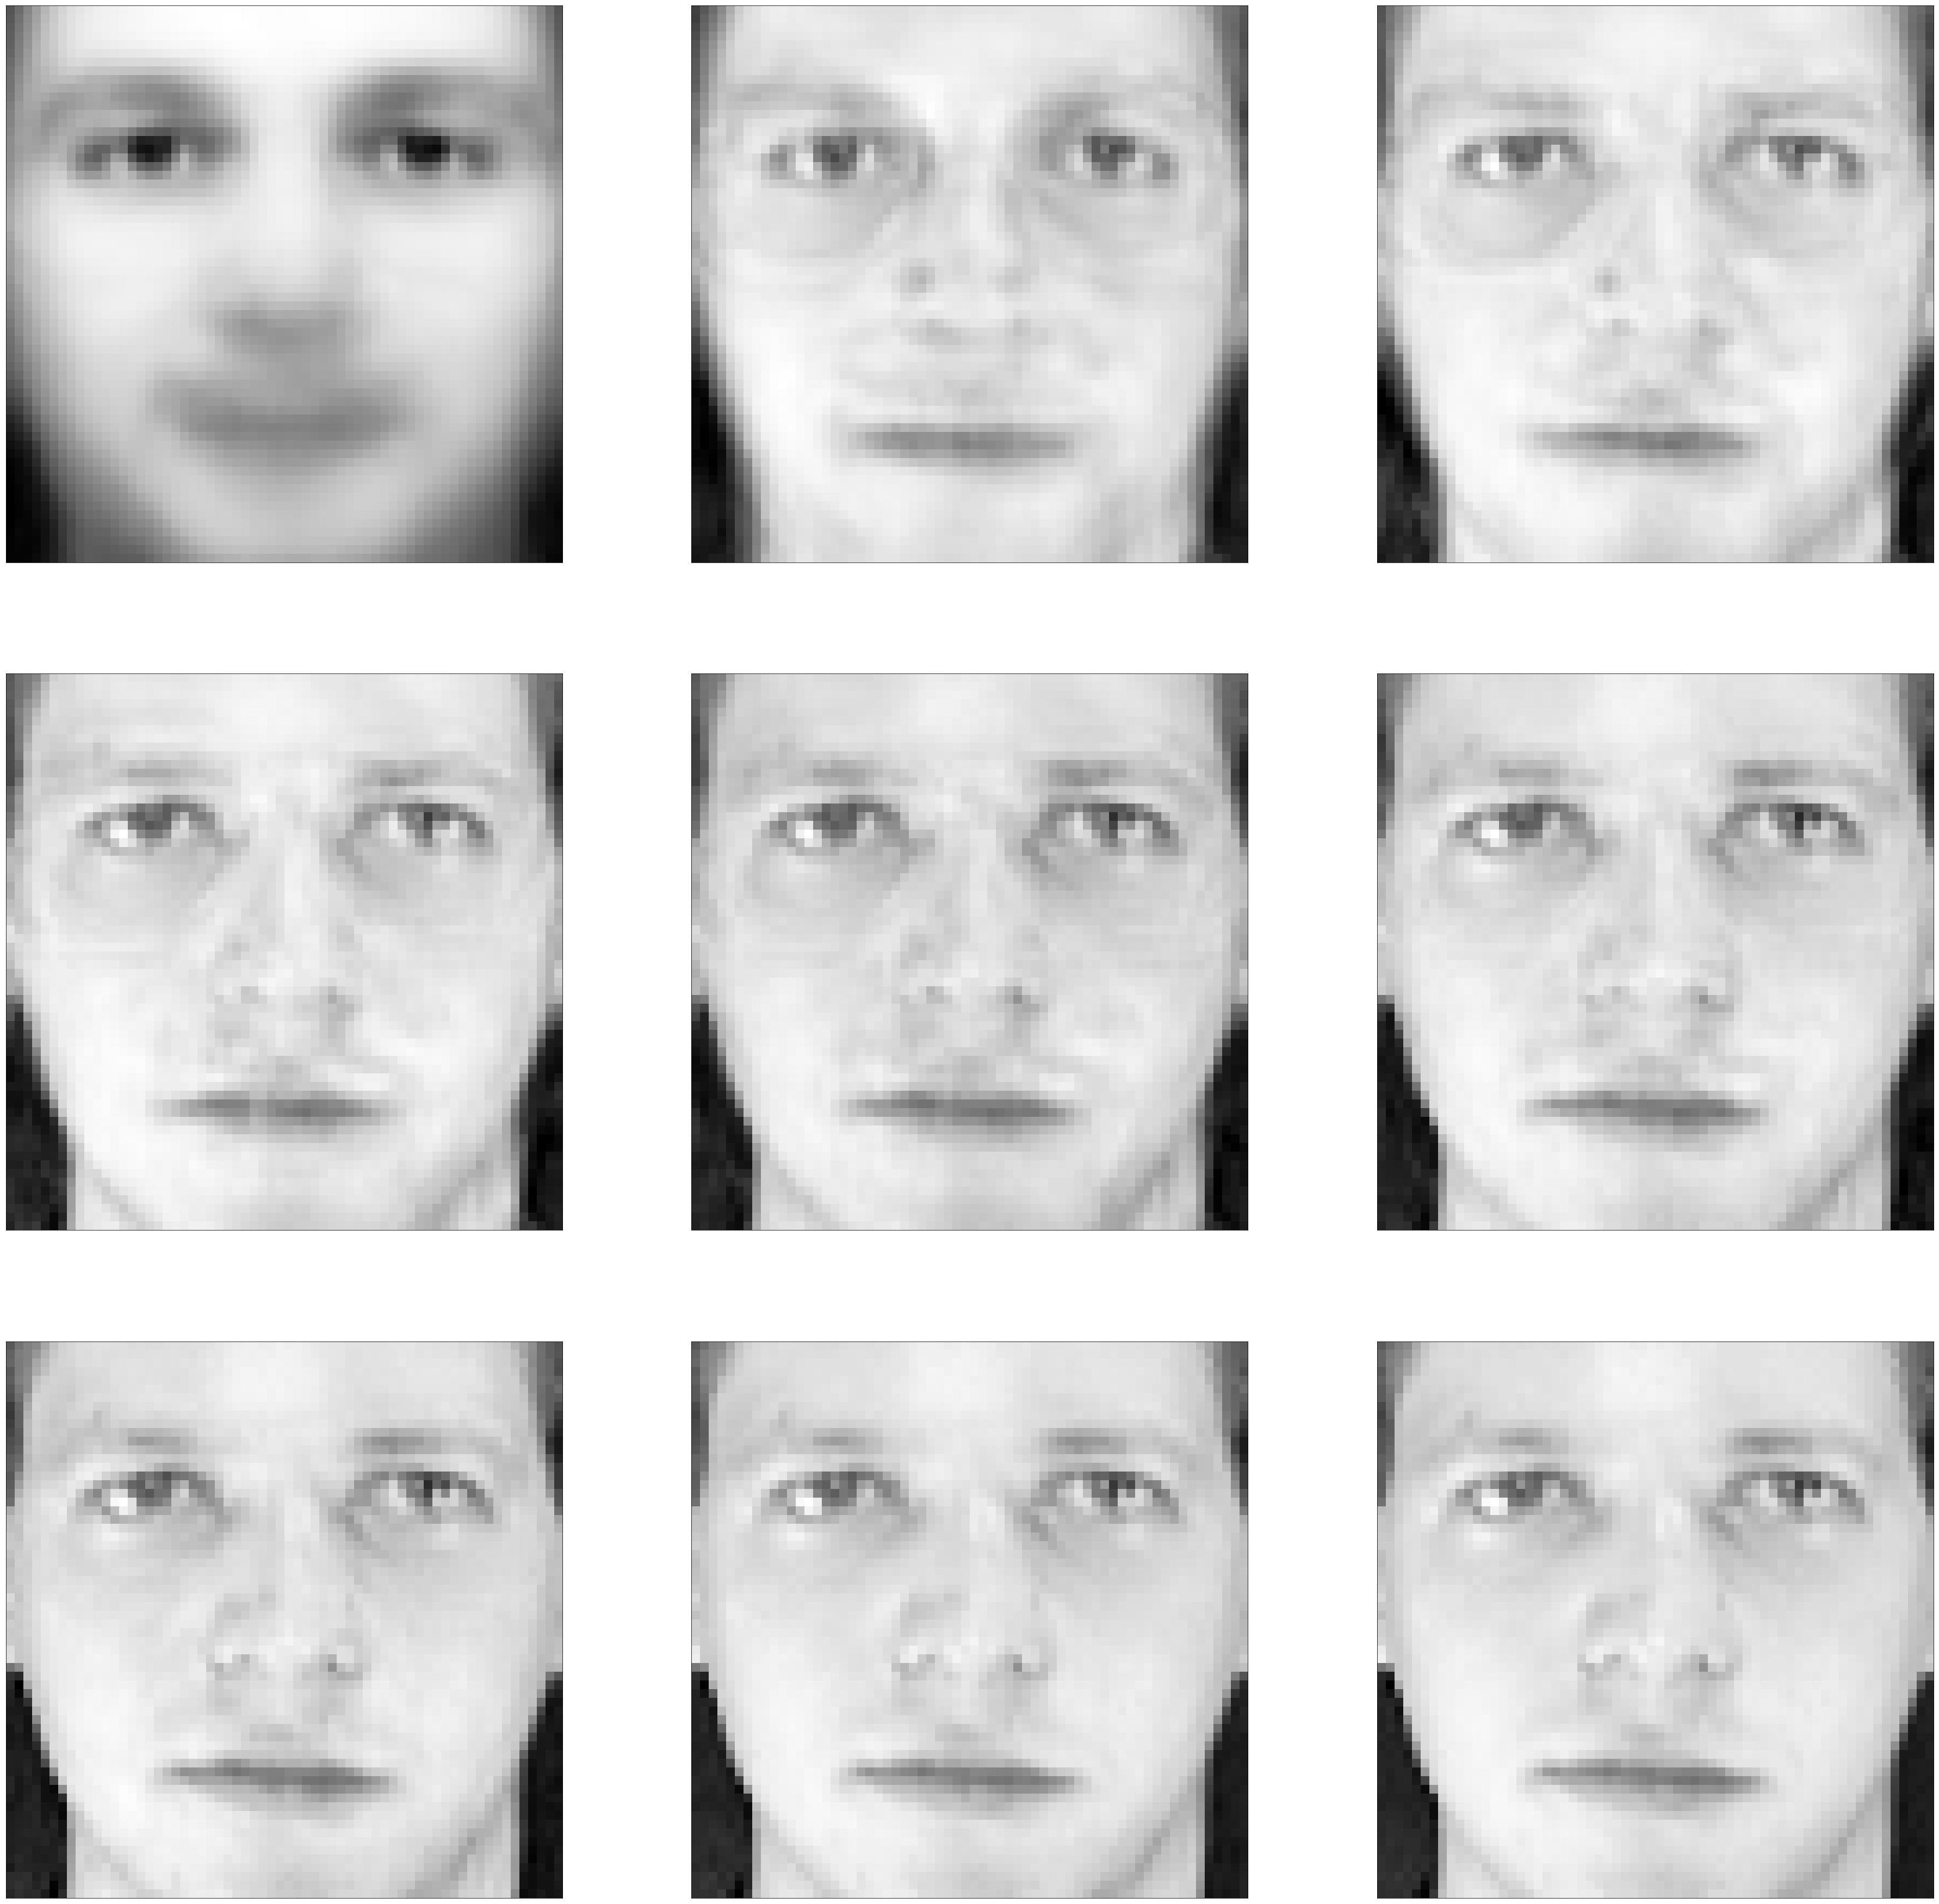

In [19]:
X_pca = pca.transform(X)
fig = plt.figure(figsize=(64,64))
for i in range(9):
    k = 1+50*i
    x = np.matmul(X_pca[0,:k],eigenfaces[:k])+mu
    x = x.reshape((64,64))
    face = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    face.imshow(x,cmap='Greys_r')
plt.show()

---